In [8]:
# Reimportar librerías y volver a cargar la imagen tras el reset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ruta de imagen reespecificada
image_path = "C:\\Estudio\\vision_computadora\\rotacion\\im.jpg"
img = Image.open(image_path)
img_array = np.array(img)



In [9]:
# Tamaño original
H, W = img_array.shape[:2]
cx, cy = (W - 1) / 2, (H - 1) / 2

- Se obtienen alto (``H``) y ancho (``W``) de la imagen.

- Se calcula el centro de la imagen en coordenadas de píxel, necesario para rotar desde el centro.

In [10]:
# Ángulo de rotación
theta_deg = 45
theta_rad = theta_deg*np.pi / 180

# Matriz de rotación
R = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad)],
    [np.sin(theta_rad),  np.cos(theta_rad)]
])

- Se convierte el ángulo de grados a radianes.

- Se crea la matriz de rotación 
**𝑅**, usada para rotar puntos en 2D

In [11]:
# Calcular bounding box
corners = np.array([
    [-cx, -cy],
    [W - cx - 1, -cy],
    [-cx, H - cy - 1],
    [W - cx - 1, H - cy - 1]
])
rotated_corners = np.dot(R, corners.T).T
min_xy = rotated_corners.min(axis=0)
max_xy = rotated_corners.max(axis=0)

new_W = int(np.ceil(max_xy[0] - min_xy[0]))
new_H = int(np.ceil(max_xy[1] - min_xy[1]))

- Se calcula cómo se ven las esquinas de la imagen tras la rotación.

- Se determina el tamaño mínimo del nuevo lienzo que cubra toda la imagen rotada (sin recortes).

In [12]:
# Imagen de salida con fondo blanco
rotated_img = np.ones((new_H, new_W, 3), dtype=np.uint8) * 255


- Se crea una nueva imagen vacía del tamaño calculado.

- Se llena de blanco (255 en jpg).

In [13]:
# Mapeo inverso con interpolación bilineal
for y_new in range(new_H):
    for x_new in range(new_W):
        x_centered = x_new + min_xy[0]
        y_centered = y_new + min_xy[1]

        original = np.dot(R.T, np.array([x_centered, y_centered]))
        x_orig = original[0] + cx
        y_orig = original[1] + cy

        if 0 <= x_orig < W - 1 and 0 <= y_orig < H - 1:
            x0 = int(np.floor(x_orig))
            y0 = int(np.floor(y_orig))
            dx = x_orig - x0
            dy = y_orig - y0

            top_left = img_array[y0, x0]
            top_right = img_array[y0, x0 + 1]
            bottom_left = img_array[y0 + 1, x0]
            bottom_right = img_array[y0 + 1, x0 + 1]

            top = top_left * (1 - dx) + top_right * dx
            bottom = bottom_left * (1 - dx) + bottom_right * dx
            pixel = top * (1 - dy) + bottom * dy

            rotated_img[y_new, x_new] = pixel.astype(np.uint8)


- Se aplica **mapeo inverso**: por cada píxel en la imagen rotada se busca su posición correspondiente en la imagen original.

- Se usa **interpolación bilineal** para obtener colores suaves.

- Si la posición mapeada está dentro de la imagen original, se calcula el color del píxel y se asigna.

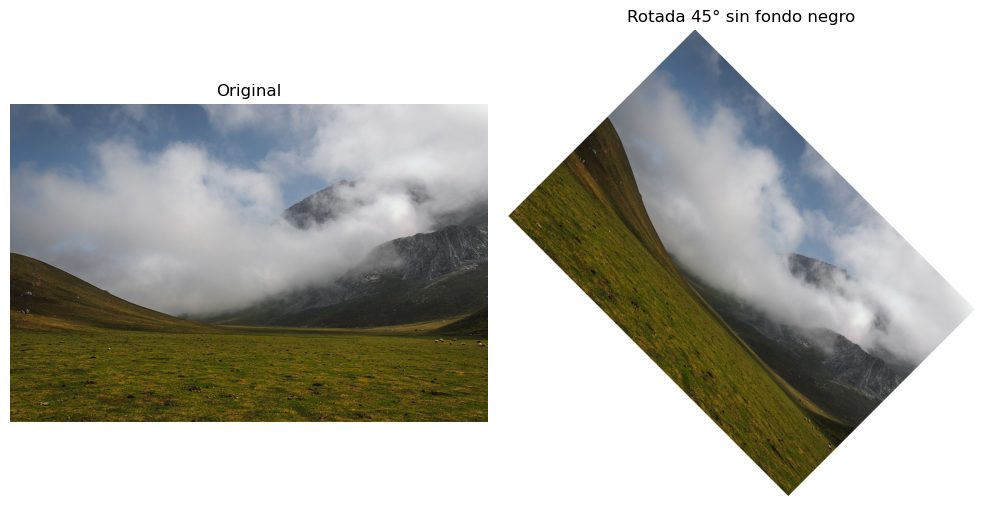

In [ ]:
# Mostrar resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotada 45° ")
plt.axis("off")
plt.tight_layout()
plt.show()


- Se visualiza la imagen original y la imagen rotada lado a lado usando ``matplotlib``.